# Covid data wrangling

In [22]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline
import datetime

Covid dataset source [https://github.com/CSSEGISandData/COVID-19](https://github.com/CSSEGISandData/)

In [23]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_org = pd.read_csv(url)
data_org.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,765,844,851,852,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,86,86,86,86,86,88,91,92,96


## Melt Data (wide format -> Long format)

In [24]:
data = data_org.melt()
data.head()

,variable,value
0,Province/State,NaN
1,Province/State,NaN
2,Province/State,NaN
3,Province/State,NaN
4,Province/State,NaN


In [25]:
cols_retain = ['Province/State', 'Country/Region', 'Lat', 'Long']
data = data_org.melt(id_vars=cols_retain)
data.head()

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [26]:
cols_retain = ['Province/State', 'Country/Region', 'Lat', 'Long']
data = data_org.melt(id_vars=cols_retain)
data = data.rename(columns={'variable': 'Date', 'value': 'confirmed'})
data.head()

,Province/State,Country/Region,Lat,Long,Date,confirmed
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [27]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')
data['Date'].head()

0   2020-01-22
1   2020-01-22
2   2020-01-22
3   2020-01-22
4   2020-01-22
Name: Date, dtype: datetime64[ns]

In [28]:
data['Date'].min(), data['Date'].max()

(Timestamp('2020-01-22 00:00:00'), Timestamp('2020-06-09 00:00:00'))

In [29]:
data.isna().sum() / data.shape[0] * 100

Province/State    69.548872
Country/Region     0.000000
Lat                0.000000
Long               0.000000
Date               0.000000
confirmed          0.000000
dtype: float64

In [34]:
data[~data['Province/State'].isna()]

,Province/State,Country/Region,Lat,Long,Date,confirmed
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0
11,Queensland,Australia,-28.0167,153.4000,2020-01-22,0
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0
...,...,...,...,...,...,...
37223,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-06-09,8
37224,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-06-09,12
37229,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,2020-06-09,7
37231,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-06-09,13


In [35]:
data_country = data.groupby(['Country/Region', 'Date']).agg({'confirmed': sum,
                                                             'Lat': 'first',
                                                             'Long': 'first'})
data_country.head()

confirmed   Lat  Long
Country/Region Date                             
Afghanistan    2020-01-22          0  33.0  65.0
               2020-01-23          0  33.0  65.0
               2020-01-24          0  33.0  65.0
               2020-01-25          0  33.0  65.0
               2020-01-26          0  33.0  65.0

In [36]:
data_country = data_country.reset_index()
data_country.head()

,Country/Region,Date,confirmed,Lat,Long
0,Afghanistan,2020-01-22,0,33.0,65.0
1,Afghanistan,2020-01-23,0,33.0,65.0
2,Afghanistan,2020-01-24,0,33.0,65.0
3,Afghanistan,2020-01-25,0,33.0,65.0
4,Afghanistan,2020-01-26,0,33.0,65.0


In [37]:
data_country.shape, data.shape

((26320, 5), (37240, 6))

In [38]:
data_country[data_country['Date'] == data_country['Date'].max()]['Country/Region'].value_counts()

Sudan            1
Liechtenstein    1
Nepal            1
Serbia           1
Botswana         1
                ..
Benin            1
Hungary          1
Saudi Arabia     1
Bhutan           1
Brazil           1
Name: Country/Region, Length: 188, dtype: int64

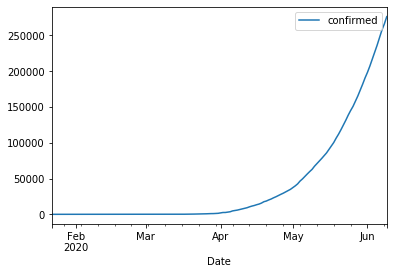

In [39]:
data_country[data_country['Country/Region'] == 'India'].plot.line(x='Date', y='confirmed')

In [40]:
def extract_wrangle_data(variable_type):
    # Extract data
    base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19'
    url = base_url + '_%s_global.csv' % variable_type
    data_org = pd.read_csv(url)
    
    # Reshape (wide -> long)
    cols_retain = ['Province/State', 'Country/Region', 'Lat', 'Long']
    data = data_org.melt(id_vars=cols_retain)
    data = data.rename(columns={'variable': 'Date', 'value': variable_type})
    data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')
    
    # Change granularity
    data_country = data.groupby(['Country/Region', 'Date']).agg({variable_type: sum,
                                                             'Lat': 'first',
                                                             'Long': 'first'})
    data_country = data_country.reset_index()
    return data_country

In [41]:
confirmed = extract_wrangle_data('confirmed')
deaths = extract_wrangle_data('deaths')
recovered = extract_wrangle_data('recovered')

In [44]:
confirmed.head()

,Country/Region,Date,confirmed,Lat,Long
0,Afghanistan,2020-01-22,0,33.0,65.0
1,Afghanistan,2020-01-23,0,33.0,65.0
2,Afghanistan,2020-01-24,0,33.0,65.0
3,Afghanistan,2020-01-25,0,33.0,65.0
4,Afghanistan,2020-01-26,0,33.0,65.0


In [45]:
common_columns = ['Country/Region', 'Date', 'Lat', 'Long']
data_final = confirmed.merge(deaths, on=common_columns, how='inner').merge(recovered, on=common_columns, how='inner')
data_final.head()

,Country/Region,Date,confirmed,Lat,Long,deaths,recovered
0,Afghanistan,2020-01-22,0,33.0,65.0,0,0
1,Afghanistan,2020-01-23,0,33.0,65.0,0,0
2,Afghanistan,2020-01-24,0,33.0,65.0,0,0
3,Afghanistan,2020-01-25,0,33.0,65.0,0,0
4,Afghanistan,2020-01-26,0,33.0,65.0,0,0
